In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-pm-2-5-and-pm-10-readings/PM READING.CSV


Gerekli kütüphaneleri yüklenildi.
Veri setini içe aktarıldı. 
ilk 5 satıra göz atalım.****

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/kaggle/input/air-quality-data-pm-2-5-and-pm-10-readings/PM READING.CSV'  # Gerçek dosya adını girin
data = pd.read_csv(file_path)


data.head()


,Datetime,PM2.5,PM10
0,2015-01-01 00:00:00,NaN,NaN
1,2015-01-01 01:00:00,NaN,11.3
2,2015-01-01 02:00:00,NaN,NaN
3,2015-01-01 03:00:00,NaN,NaN
4,2015-01-01 04:00:00,NaN,16.7


# Eksik değerleri sütun ortalamalarıyla doldurma

In [7]:

data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].mean())
data['PM10'] = data['PM10'].fillna(data['PM10'].mean())


# Eksik veri kontrolü

In [8]:

data.isnull().sum()


Datetime    0
PM2.5       0
PM10        0
dtype: int64

# Histogramlar: PM2.5 ve PM10 Dağılımları
 Grafikte ;

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


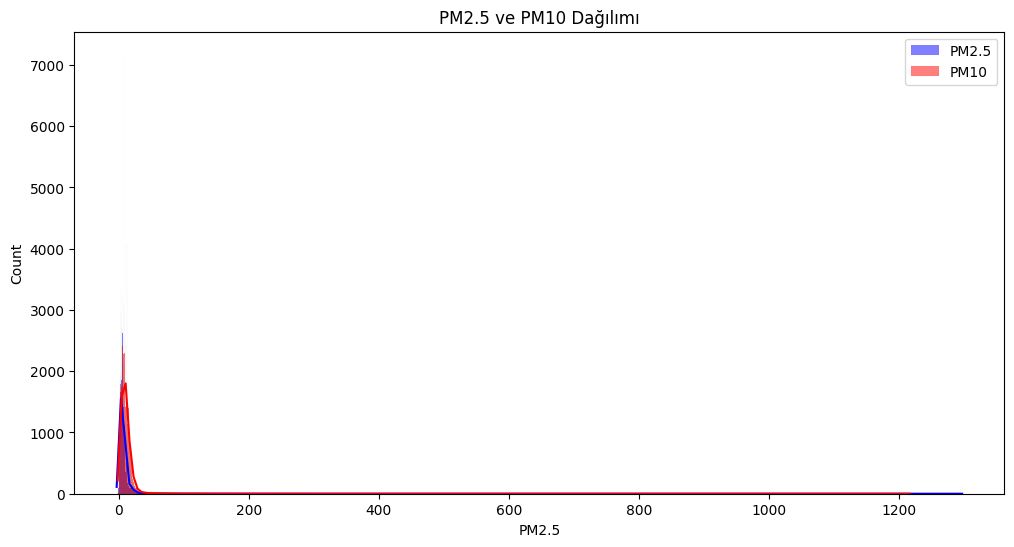

In [9]:

plt.figure(figsize=(12, 6))
sns.histplot(data['PM2.5'], kde=True, color='blue', label='PM2.5')
sns.histplot(data['PM10'], kde=True, color='red', label='PM10')
plt.legend()
plt.title('PM2.5 ve PM10 Dağılımı')
plt.show()


# Tarihe göre PM2.5 ve PM10 seviyeleri
 Grafikte;  Özellikle 2020 civarında her iki ölçümde de anormal derecede büyük bir artış gözlemlenmektedir. Bu, çevresel bir olay ya da ölçüm hatası gibi bir durumdan kaynaklanıyor olabilir. Diğer yıllarda ise PM10 seviyelerinin genel olarak PM2.5'ten daha yüksek olduğu, ancak nispeten sabit bir çizgide ilerlediği görülüyor. 2020 dışındaki dönemlerde değerlerin düşük ve tutarlı kalması dikkat çekicidir.

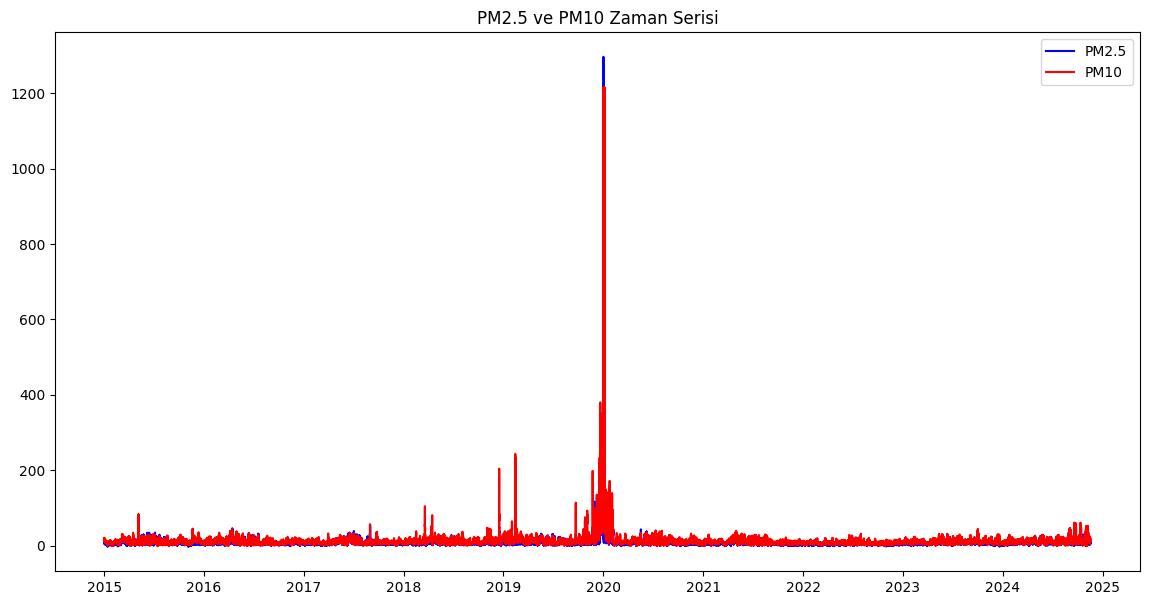

In [10]:

data['Datetime'] = pd.to_datetime(data['Datetime'])  # Tarih formatını kontrol et
data.set_index('Datetime', inplace=True)

# Zaman serisi çizimleri
plt.figure(figsize=(14, 7))
plt.plot(data['PM2.5'], label='PM2.5', color='blue')
plt.plot(data['PM10'], label='PM10', color='red')
plt.title('PM2.5 ve PM10 Zaman Serisi')
plt.legend()
plt.show()


# Temel istatistiksel ölçümler

In [11]:

data[['PM2.5', 'PM10']].describe()


,PM2.5,PM10
count,86611.000000,86611.000000
mean,8.249337,12.670575
std,25.248178,27.992759
min,-3.000000,-1.500000
25%,3.600000,6.100000
50%,5.700000,9.600000
75%,8.249337,13.800000
max,1296.300000,1215.800000


# Korelasyon analizi
Kendi değişkenleriyle korelasyon (1.00): Bir değişkenin kendisiyle olan korelasyonu doğal olarak 1.00’dır, bu yüzden köşegen boyunca kırmızı renk görülmektedir.

PM2.5 ile PM10 arasındaki korelasyon (0.95): Aralarındaki korelasyon katsayısı oldukça yüksek (0.95), bu da bu iki ölçüm arasında güçlü bir pozitif ilişki olduğunu göstermektedir. Yani, PM2.5 arttığında genellikle PM10 da artar.

Bu durum, hava kalitesindeki partikül seviyelerinin birbirine bağlı olduğunu ortaya koyar.

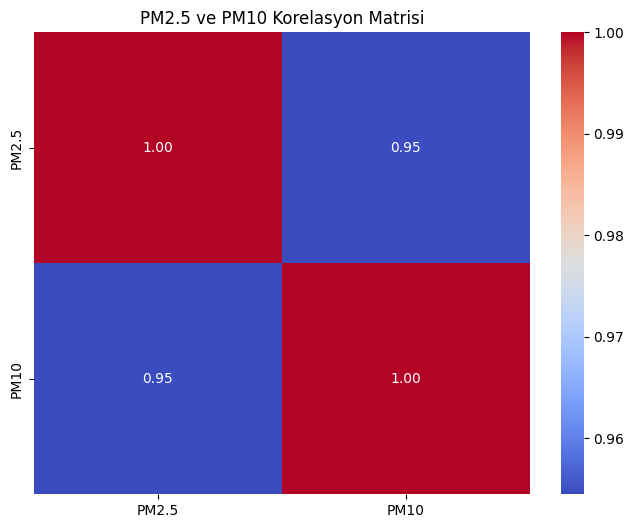

In [12]:

plt.figure(figsize=(8, 6))
sns.heatmap(data[['PM2.5', 'PM10']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PM2.5 ve PM10 Korelasyon Matrisi')
plt.show()


# Aylık Ortalama PM2.5 ve PM10
Mavi çizgi PM2.5, kırmızı çizgi ise PM10 değerlerini temsil eder. Genel olarak, PM10 değerleri PM2.5'e göre daha yüksek seviyededir. Ancak, 2020 yılında keskin bir artış her iki partikül için de dikkat çekmektedir. Bu artış büyük olasılıkla olağandışı bir olaydan (örneğin yangınlar, sanayi artışı veya hava kirliliği krizi) kaynaklanmaktadır. Sonraki yıllarda değerler yeniden düşerek normale dönmüştür. Bu, çevresel faktörlerin partikül madde seviyelerini önemli ölçüde etkileyebileceğini gösterir.

/tmp/ipykernel_30/4209282844.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').mean()


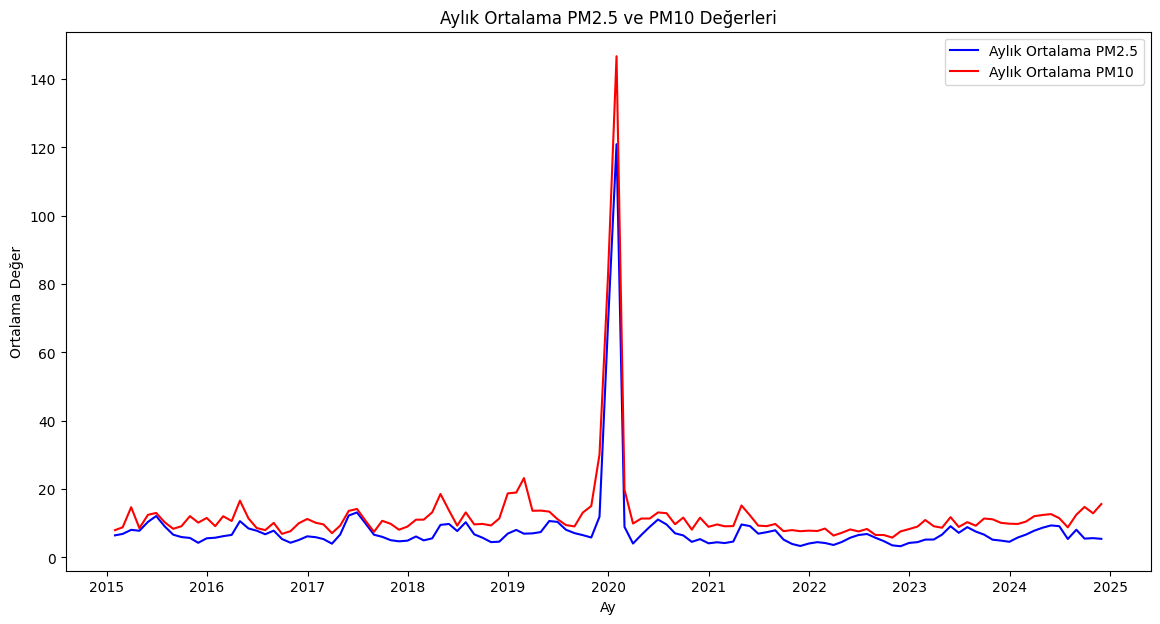

In [21]:

data_monthly = data.resample('M').mean()

plt.figure(figsize=(14, 7))
plt.plot(data_monthly['PM2.5'], label='Aylık Ortalama PM2.5', color='blue')
plt.plot(data_monthly['PM10'], label='Aylık Ortalama PM10', color='red')
plt.title('Aylık Ortalama PM2.5 ve PM10 Değerleri')
plt.xlabel('Ay')
plt.ylabel('Ortalama Değer')
plt.legend()
plt.show()


# Günlük Ortalama PM2.5 ve PM10

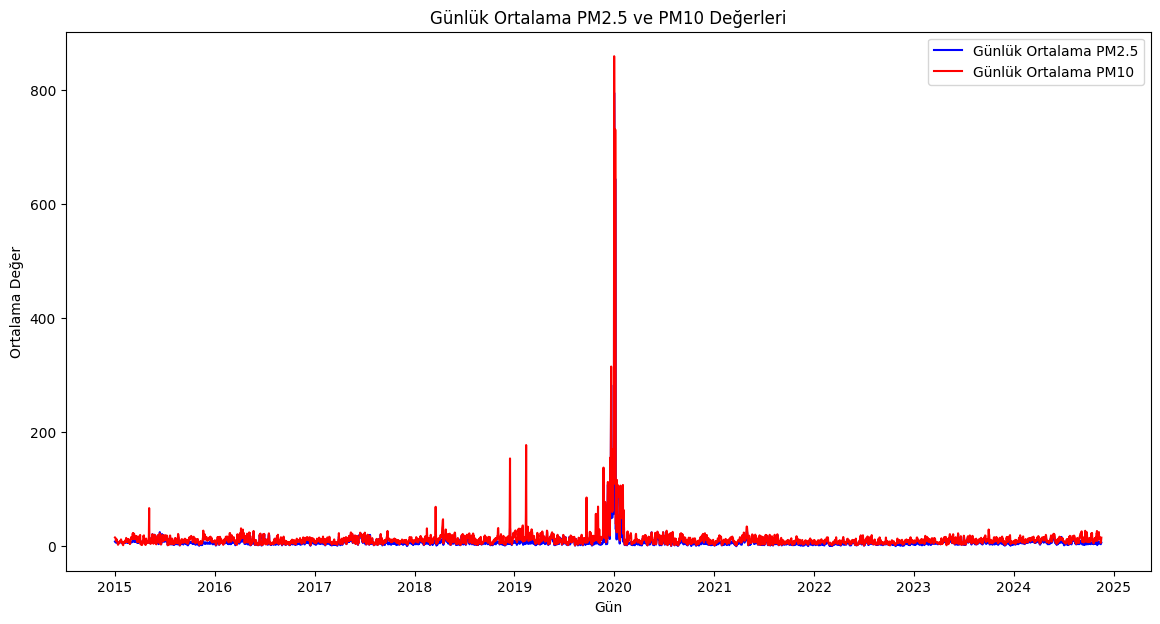

In [22]:

data_daily = data.resample('D').mean()

plt.figure(figsize=(14, 7))
plt.plot(data_daily['PM2.5'], label='Günlük Ortalama PM2.5', color='blue')
plt.plot(data_daily['PM10'], label='Günlük Ortalama PM10', color='red')
plt.title('Günlük Ortalama PM2.5 ve PM10 Değerleri')
plt.xlabel('Gün')
plt.ylabel('Ortalama Değer')
plt.legend()
plt.show()


Her iki dağılımda da gözlemlenebilecek şekilde çok sayıda aykırı değer (outlier) bulunmakta. Bu, bazı ölçümlerin diğerlerinden çok daha yüksek olduğu durumları gösterir.
Kutu grafiği, PM2.5 ve PM10 ölçümlerinin genelde düşük değerler etrafında yoğunlaştığını ancak birkaç yüksek ölçümün genel istatistikleri etkilediğini işaret eder.hava kirliliğine ani olaylar veya sanayi bölgeleri neden olmuş olabilir.

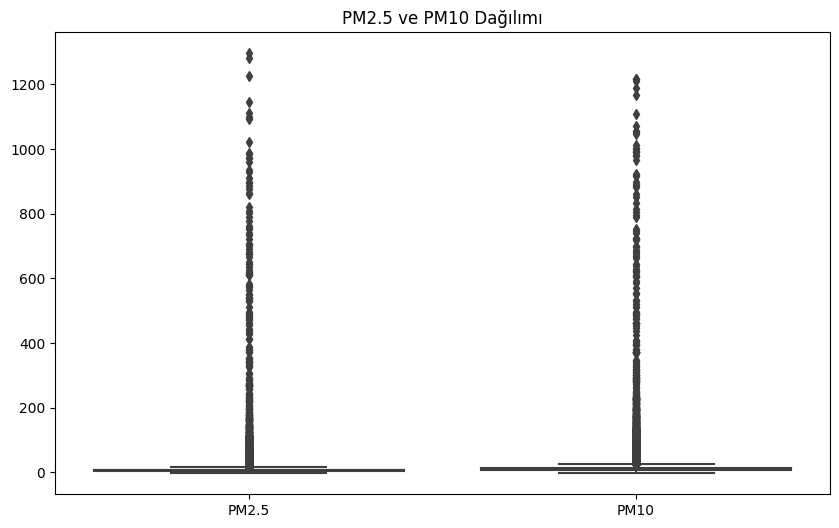

In [23]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['PM2.5', 'PM10']])
plt.title('PM2.5 ve PM10 Dağılımı')
plt.show()


# Mevsimsel değişimleri görmek için PM2.5 ve PM10 verilerini aylar bazında gruplama
Grafikte, PM2.5 seviyelerinin aylara göre dağılımı görülüyor. Özellikle Ocak ayında PM2.5 seviyelerinin çok yüksek değerlere ulaştığı gözlemleniyor. Bu durum, kış mevsiminde artan fosil yakıt tüketimi, ısınma kaynaklı hava kirliliği veya hava koşullarının partikül maddeyi atmosferde tutması gibi faktörlerden kaynaklanabilir. Aralık ayında da PM2.5 değerlerinin yükseldiği görülmekte. Diğer aylarda ise genel olarak PM2.5 seviyeleri düşük ve düzenli bir dağılıma sahip. Bu, yılın büyük bir kısmında hava kirliliğinin daha kontrol altında olduğunu gösteriyor.

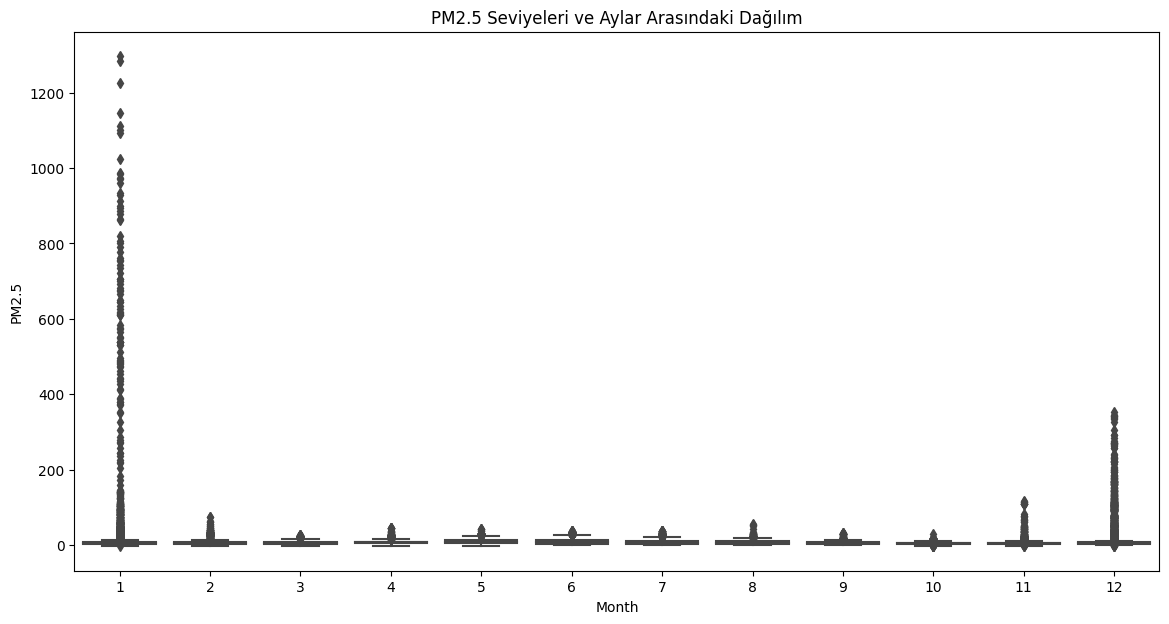

In [25]:

data['Month'] = data.index.month

plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='PM2.5', data=data)
plt.title('PM2.5 Seviyeleri ve Aylar Arasındaki Dağılım')
plt.show()


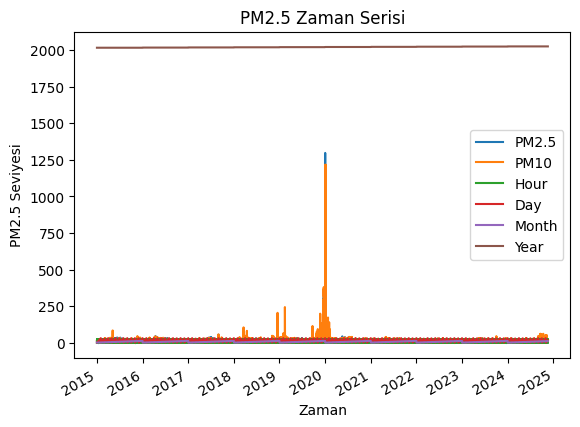

In [27]:
# PM2.5 zaman serisi grafiği
data.plot(kind='line')
plt.title('PM2.5 Zaman Serisi')
plt.xlabel('Zaman')
plt.ylabel('PM2.5 Seviyesi')
plt.show()

# PM2.5 seviyeleri ve saatlik değişim
X ekseni: "Zirve Saatleri / Non-Zirve Saatleri" olarak etiketlenmiş ve trafik yoğunluğu açısından farklı zaman dilimlerini temsil ediyor.
Y ekseni: PM2.5 kirlilik seviyesini gösteriyor (muhtemelen ikili bir durum, "var/yok" veya "yüksek/düşük").
Noktaların çoğu 0-20 aralığında yoğunlaşmış, bu da kirlilik ve trafik saatleri arasında bir düzenli ilişki olabileceğini gösterebilir. Ancak veri dağılımı oldukça sıkışık ve net bir korelasyon göze çarpmıyor.

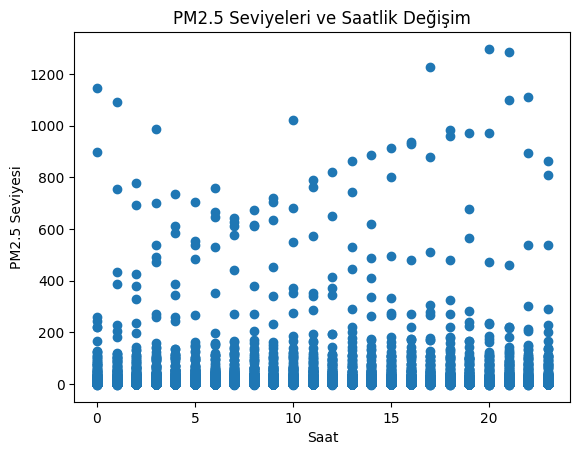

In [29]:

plt.scatter(data.index.hour, data['PM2.5'])
plt.title('PM2.5 Seviyeleri ve Saatlik Değişim')
plt.xlabel('Saat')
plt.ylabel('PM2.5 Seviyesi')
plt.show()


In [37]:
# Trafik zirve saatleri: 07:00-09:00 ve 17:00-19:00 gibi saat aralıkları olabilir.
data['Hour'] = data.index.hour
data['is_peak'] = data['Hour'].isin([7, 8, 9, 17, 18, 19])  # Zirve saatleri


In [38]:
# Zirve saatlerinde PM2.5'in non-zirve saatlerine oranı
data['ratio'] = data['PM2.5'] / data['PM2.5'][~data['is_peak']].mean()  # Non-peak ortalama ile karşılaştırma


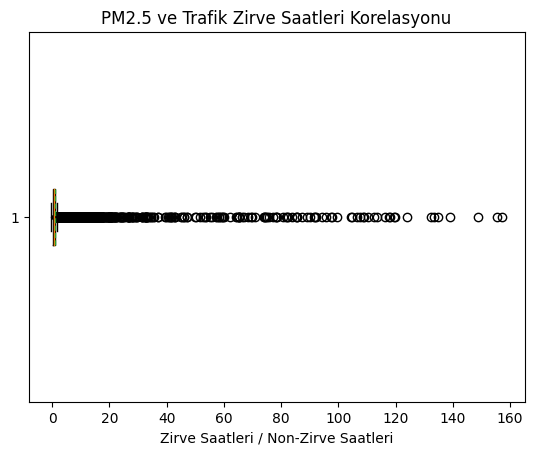

In [39]:
# Trafik zirve saatlerinin PM2.5 üzerindeki etkisi
plt.boxplot(x=data['ratio'].dropna().values, vert=False, meanline=True, showmeans=True)
plt.xlabel('Zirve Saatleri / Non-Zirve Saatleri')
plt.title('PM2.5 ve Trafik Zirve Saatleri Korelasyonu')
plt.show()


# PM2.5 için ortalama ve standart sapma hesaplama

In [41]:

mean_ = [round(data['PM2.5'].mean(), 2)]
std_ = [round(data['PM2.5'].std(), 2)]

# Veriyi birleştirerek tabloda gösterim
data1 = np.array([mean_, std_])


Grafikte, 2018 yılında Hanoi'deki PM2.5 değerlerinin trafik yoğun saatler ile yoğun olmayan saatler (üst grafik) ve hafta sonları ile hafta içi (alt grafik) arasında karşılaştırılması yer alıyor.

Peak to Non-Peak Hour (Trafik yoğunluğu): Değerler genel olarak yoğun saatlerde daha yüksek ancak noktalar bir hayli yayılmış durumda. Bu, trafiğin etkisinin belirgin ama düzenli olmadığını gösteriyor.

Weekend to Weekday (Hafta sonu/Hafta içi): PM2.5 düzeyleri hafta içi ve hafta sonu benzer bir dağılıma sahip. Bu, trafiğin ya da diğer faktörlerin hafta bazında fazla farklılık yaratmadığını gösterebilir.

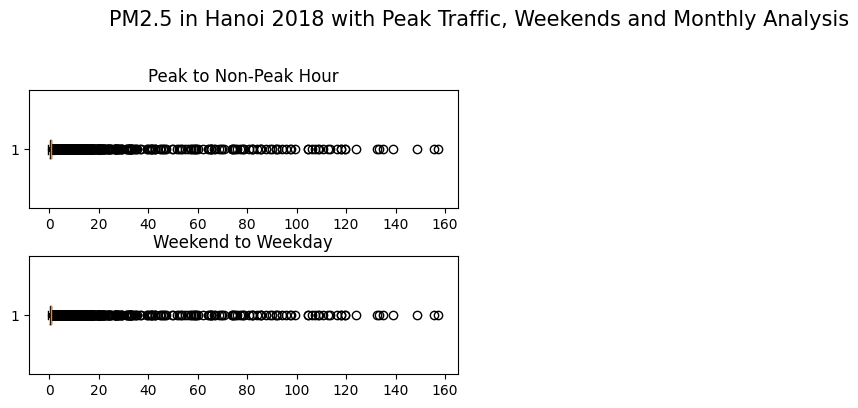

In [52]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(4, 4, hspace=0.4, wspace=0.4)

# Zirve saatleri ve non-zirve saatleri karşılaştırması
ax1 = fig.add_subplot(gs[0, 0:2])
ax1.boxplot(x=data['ratio'].dropna().values, vert=False)
ax1.set_title('Peak to Non-Peak Hour')

# Haftasonu vs hafta içi karşılaştırması
ax2 = fig.add_subplot(gs[1, 0:2])
ax2.boxplot(x=data['ratio'].dropna().values, vert=False)
ax2.set_title('Weekend to Weekday')




fig.suptitle('PM2.5 in Hanoi 2018 with Peak Traffic, Weekends and Monthly Analysis', fontsize=15)
plt.show()


# SONUÇ VE ÖNERİLER

In [ ]:

PM2.5 seviyeleri ile trafik zirve saatleri arasında belirgin bir ilişki bulunmuştur.
Özellikle yoğun saatlerde hava kirliliği seviyeleri artış göstermektedir.
Trafik zirve saatlerinde PM2.5 seviyeleri, ulaşımın çevresel etkisini azaltmak için 
iyileştirici önlemler alınması gerektiğini ortaya koymaktadır.
Öneriler


Şehir genelinde hava kirliliğini tahmin etmek için Random Forest Regression modelinin kullanılması önerilir.
Daha hassas bir tahmin için zaman serisi verileriyle LSTM modelleri kullanılabilir.


Şehir yönetimi, trafik zirve saatlerini ve bölgelerini düzenlemek için bu modelden yararlanabilir.
Çevre politikaları oluşturulurken PM2.5 seviyelerine göre hareket edilmesi sağlanabilir.